In [5]:
from syntax.slide import Slide
from syntax.transformers.tissue_mask import OtsuTissueMask
from syntax.transformers.tissue_mask import visualize
from syntax.transformers.tiling import SimpleTiling
from syntax.transformers.base import Pipeline


import matplotlib.pyplot as plt
import glob
import os
import numpy as np
%matplotlib inline

def show_PIL(pil_im, size=5):
    '''A function to show PIL images in the notebook.'''
    plt.figure(figsize=(size,size))
    plt.imshow(np.asarray(pil_im),cmap='gray')

In [6]:
slide_path = "/home/jevjev/Dropbox/Projects/wsi-syntax-test/TCGA-AC-A5XU-01Z-00-DX1.1AEEFAAF-0906-4086-8022-13B689FAB9F5.svs"


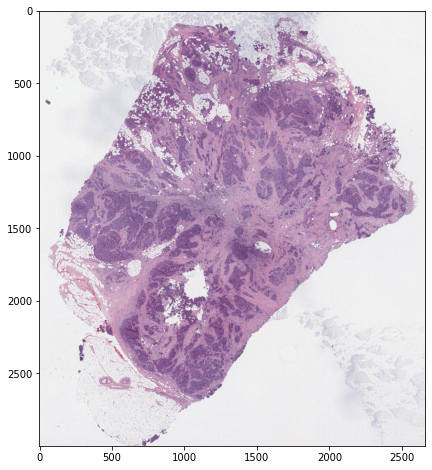

In [7]:
slide = Slide(slide_path=slide_path)

thumb = slide.get_thumbnail(size=(3000,3000))
show_PIL(thumb, size=8)

In [4]:
slide = OtsuTissueMask().fit_transform(slide)

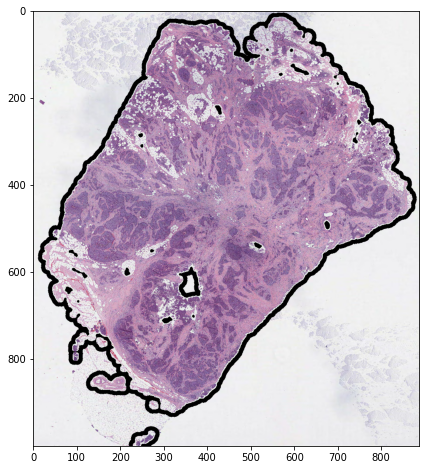

In [5]:
vis = visualize(tissue_mask=slide.tissue_mask, slide=slide, size=1000)
show_PIL(vis, size=8)

In [6]:
slide = SimpleTiling(magnification=40, tile_size=224, max_per_class=10).fit_transform(slide=slide)

/home/jevjev/Dropbox/Projects/wsi-syntax/syntax/transformers/tiling/tiling.py:188: UserWarning: TCGA-AC-A5XU-01Z-00-DX1.1AEEFAAF-0906-4086-8022-13B689FAB9F5 slide does not have annotation mask supplied
  warnings.warn(warning_string)


Rejected 1 patches for file TCGA-AC-A5XU-01Z-00-DX1.1AEEFAAF-0906-4086-8022-13B689FAB9F5


In [10]:
pipeline = Pipeline([OtsuTissueMask(), SimpleTiling(magnification=40, 
                                                  tile_size=224, 
                                                  max_per_class=10)])

In [11]:
slide = pipeline.fit_transform(slide)

/home/jevjev/Dropbox/Projects/wsi-syntax/syntax/transformers/tiling/tiling.py:188: UserWarning: TCGA-AC-A5XU-01Z-00-DX1.1AEEFAAF-0906-4086-8022-13B689FAB9F5 slide does not have annotation mask supplied
  warnings.warn(warning_string)


Rejected 0 patches for file TCGA-AC-A5XU-01Z-00-DX1.1AEEFAAF-0906-4086-8022-13B689FAB9F5
